In [4]:
import copy
import qgrid
import numpy as np
import matplotlib.pyplot as plt
from pymatgen import Structure
from SubmitJob import SubmitJob
from dftman_utils import *

PSEUDO_TABLE = '/data/tools/shared/dftman/pseudo_table.json'
PSEUDO_FAMILY = 'GBRV_US_PBE'

qgrid.enable()
MP_API_KEY = '0WqdPfXxloze6T9N'
db = init_db()

In [30]:
criteria = {
    'elements': 'Al',
    'nsites': 1,
    'spacegroup.number': 225,
}
properties = []
m = mpquery_helper(criteria, properties, MP_API_KEY)
m.query()
m.display()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, id='fc3dc136-a434-45b3-a664-ed42dcc9a8e5', precision=5)

In [70]:
STRUCTURE = m.result[0]['structure']
PSEUDO = pseudo_helper(STRUCTURE, PSEUDO_FAMILY,
                       PSEUDO_TABLE)
base_inputs = {
        'structure': STRUCTURE,

        'control': {
            'calculation': 'scf',
            'verbosity': 'high',
            'disk_io': 'none',
        },
        'system': {
            'ibrav': 0,
            'ecutwfc': None,
            'occupations': 'smearing',
            'degauss': 0.01,
            'smearing': 'mv',
        },
        'electrons': {
            'electron_maxstep': 500,
            'conv_thr': 1.0e-7,
        },
        'ions': {},
        'cell': {},
        'kpoints_mode': 'automatic',
        'kpoints_grid': (None, None, None),
        'kpoints_shift': (0, 0, 0),

        'pseudo': PSEUDO
    }

ecut = 35
kpoints = [10, 12, 14, 16, 18, 20, 22, 24]
kpoints_keys = []

for kpoint in kpoints:    
    inputs = copy.deepcopy(base_inputs)
    inputs['system']['ecutwfc'] = ecut
    inputs['kpoints_grid'] = (kpoint, kpoint, kpoint)
    
    runname = 'Alkpoint{}'.format(kpoint)
    calculation = pwcalculation_helper(**inputs, additional_inputs=list(PSEUDO.values()))
    job = SubmitJob(calculation, 'espresso-6.2.1_pw', runname=runname)
    
    key = db_store(job, db)
    kpoints_keys.append(key)
    
    job.submit()

print(kpoints_keys)

Added 9064a7 to the database
Submitted job Alkpoint10 9064a7
Added 405108 to the database
Submitted job Alkpoint12 405108
Added e2d8be to the database
Submitted job Alkpoint14 e2d8be
Added 0ae5bc to the database
Submitted job Alkpoint16 0ae5bc
Added 3ab9f9 to the database
Submitted job Alkpoint18 3ab9f9
Added 5698a8 to the database
Submitted job Alkpoint20 5698a8
Added 3f9edd to the database
Submitted job Alkpoint22 3f9edd
Added 42c024 to the database
Submitted job Alkpoint24 42c024
['9064a7', '405108', 'e2d8be', '0ae5bc', '3ab9f9', '5698a8', '3f9edd', '42c024']


In [33]:
# kpoints = [10, 12, 14, 16, 18, 20, 22, 24]
# structure = m.result[0]['structure']
# pseudo = pseudo_helper(structure, PSEUDO_FAMILY,
#                        PSEUDO_TABLE)
# kpoints_keys = []
# for kpoint in kpoints:
#     runname = 'Alkpoint{}'.format(kpoint)
#     inputs = {
#         'structure': structure,

#         'control': {
#             'calculation': 'scf',
#             'verbosity': 'high',
#             'disk_io': 'none',
#         },
#         'system': {
#             'ibrav': 0,
#             'ecutwfc': 35.0,
#             'occupations': 'smearing',
#             'degauss': 0.01,
#             'smearing': 'mv',
#         },
#         'electrons': {
#             'electron_maxstep': 500,
#             'conv_thr': 1.0e-7,
#         },
#         'ions': {},
#         'cell': {},
#         'kpoints_mode': 'automatic',
#         'kpoints_grid': (kpoint, kpoint, kpoint),
#         'kpoints_shift': (0, 0, 0),

#         'pseudo': pseudo
#     }
#     calculation = pwcalculation_helper(**inputs, additional_inputs=list(pseudo.values()))
#     job = SubmitJob(calculation, 'espresso-6.2.1_pw', runname=runname)
#     key = db_store(job, db)
#     kpoints_keys.append(key)
#     job.submit()
# print(kpoints_keys)

Added 81fccb to the database
Submitted job Alkpoint10 81fccb
Added 86ebeb to the database
Submitted job Alkpoint12 86ebeb
Added 4aadd6 to the database
Submitted job Alkpoint14 4aadd6
Added 5a9fc6 to the database
Submitted job Alkpoint16 5a9fc6
Added aef06f to the database
Submitted job Alkpoint18 aef06f
Added 95238e to the database
Submitted job Alkpoint20 95238e
Added 4bf1f7 to the database
Submitted job Alkpoint22 4bf1f7
Added f5295d to the database
Submitted job Alkpoint24 f5295d
['81fccb', '86ebeb', '4aadd6', '5a9fc6', 'aef06f', '95238e', '4bf1f7', 'f5295d']


In [77]:
job_statuses([db.SubmitJobs[key] for key in kpoints_keys])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, id='ddbc9a60-5223-47db-8402-1ffdff3de684', precision=5)

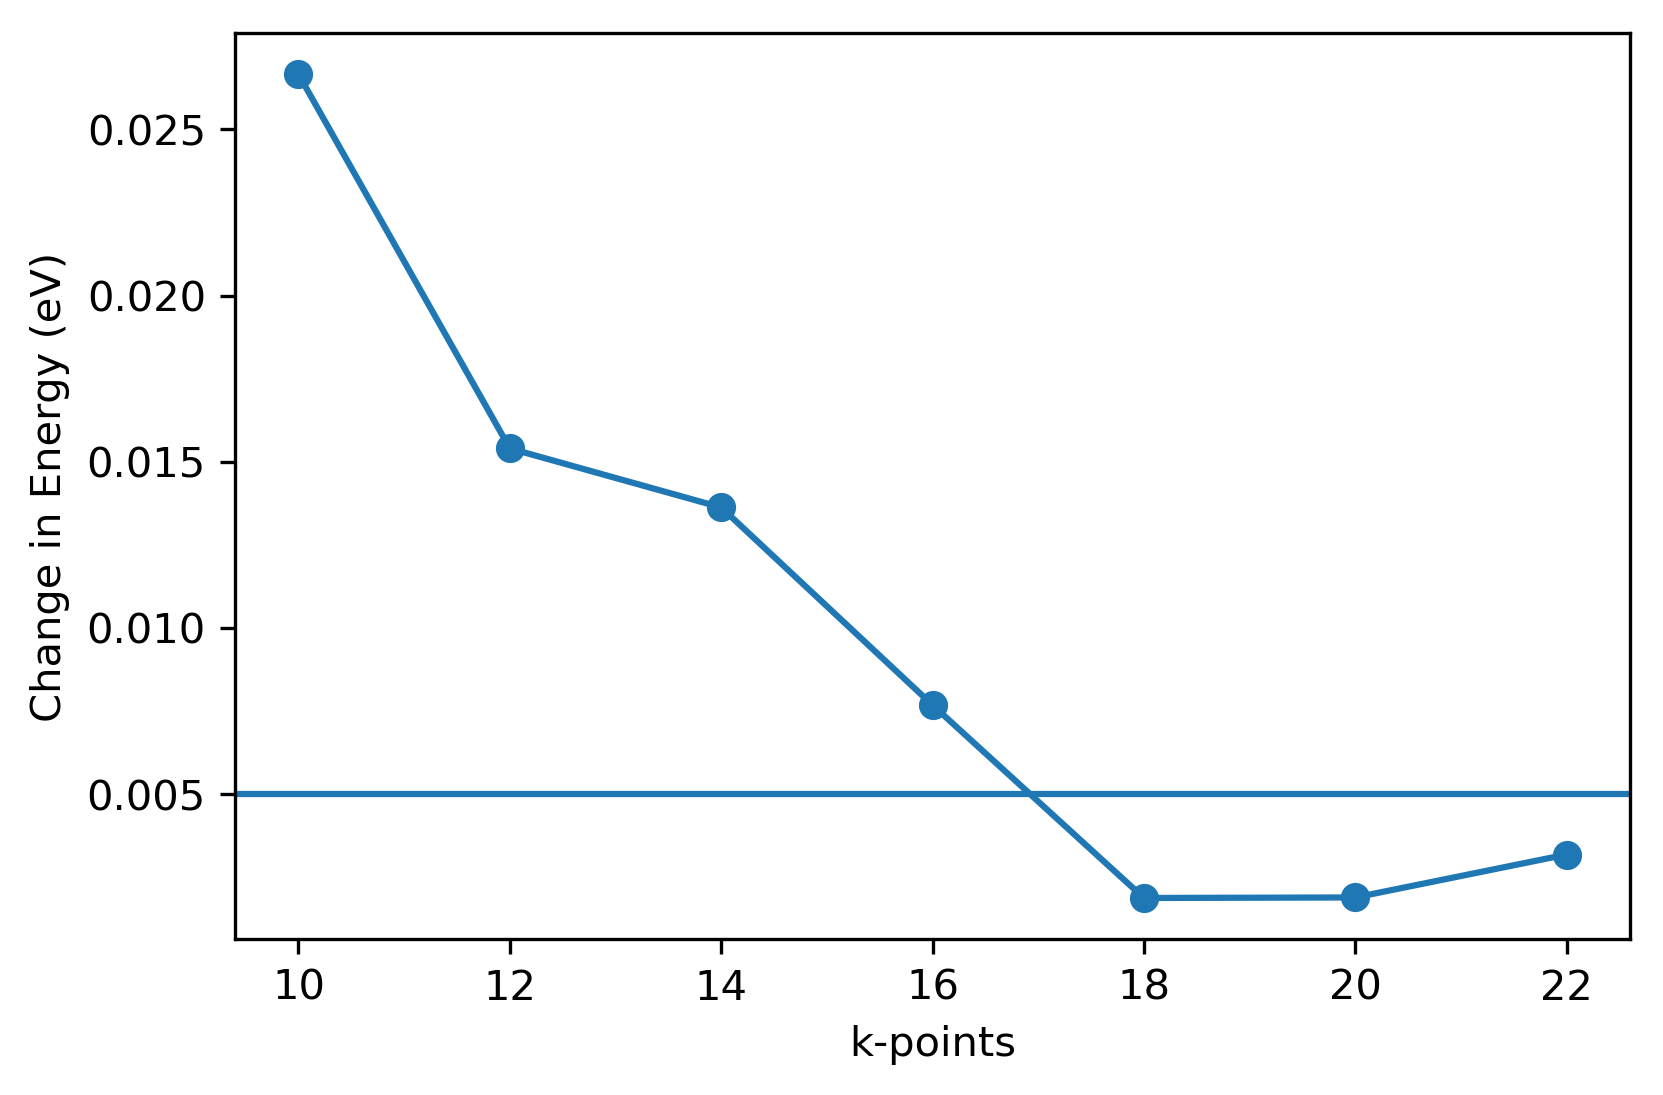

In [78]:
complete_jobs = []
for key in kpoints_keys:
    job = db.SubmitJobs[key]
    if job.status == 'Complete':
        job.parse_output()
        complete_jobs.append(job)

data = {
    'energies': [job.output.final_total_energy\
                 for job in complete_jobs],
    'k_points': [job.input.kpoints_grid[0]\
                 for job in complete_jobs]
}
df = pd.DataFrame(data)
df.sort_values(by='k_points')
df['d_energies'] = [np.abs(df['energies'][i+1] - df['energies'][i])\
                    for i in range(len(df['energies'])-1)] + [np.nan]

fig = plt.figure()
fig.set_dpi(300)
ax = plt.gca()
plt.plot(df['k_points'], df['d_energies'], marker='o')
ax.axhline(0.005)
plt.xlabel('k-points')
plt.ylabel('Change in Energy (eV)')
plt.show()
plt.close()

---

In [45]:
STRUCTURE = m.result[0]['structure']
PSEUDO = pseudo_helper(STRUCTURE, PSEUDO_FAMILY,
                       PSEUDO_TABLE)
base_inputs = {
        'structure': STRUCTURE,

        'control': {
            'calculation': 'scf',
            'verbosity': 'high',
            'disk_io': 'none',
        },
        'system': {
            'ibrav': 0,
            'ecutwfc': None,
            'occupations': 'smearing',
            'degauss': 0.01,
            'smearing': 'mv',
        },
        'electrons': {
            'electron_maxstep': 500,
            'conv_thr': 1.0e-7,
        },
        'ions': {},
        'cell': {},
        'kpoints_mode': 'automatic',
        'kpoints_grid': (None, None, None),
        'kpoints_shift': (0, 0, 0),

        'pseudo': PSEUDO
    }

kpoint = 18
ecutwfcs = [20, 25, 30, 35, 40, 45, 50]
structure = m.result[0]['structure']
pseudo = pseudo_helper(structure, PSEUDO_FAMILY,
                       PSEUDO_TABLE)
ecutwfcs_keys = []
for ecutwfc in ecutwfcs:
    inputs = copy.deepcopy(base_inputs)
    inputs['system']['ecutwfc'] = ecutwfc
    inputs['kpoints_grid'] = (kpoint, kpoint, kpoint)
    
    runname = 'Alecut{}'.format(ecutwfc)
    calculation = pwcalculation_helper(**inputs, additional_inputs=list(pseudo.values()))
    job = SubmitJob(calculation, 'espresso-6.2.1_pw', runname=runname, ncpus=2)
    
    key = db_store(job, db)
    ecutwfcs_keys.append(key)
    
    job.submit()
    
print(ecutwfcs_keys)

Added f6778b to the database
Submitted job Alecut20 f6778b
Added 989a5a to the database
Submitted job Alecut25 989a5a
Added 6380bd to the database
Submitted job Alecut30 6380bd
Added 654c92 to the database
Submitted job Alecut35 654c92
Added 546e4b to the database
Submitted job Alecut40 546e4b
Added 97725d to the database
Submitted job Alecut45 97725d
Added 63d05c to the database
Submitted job Alecut50 63d05c
['f6778b', '989a5a', '6380bd', '654c92', '546e4b', '97725d', '63d05c']


In [67]:
job_statuses([db.SubmitJobs[key] for key in ecutwfcs_keys])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, id='d3ab383c-52c1-4afe-a016-1bd3094df32e', precision=5)

In [68]:
complete_jobs = []
for key in ecutwfcs_keys:
    job = db.SubmitJobs[key]
    if job.status == 'Complete':
        job.parse_output()
        complete_jobs.append(job)

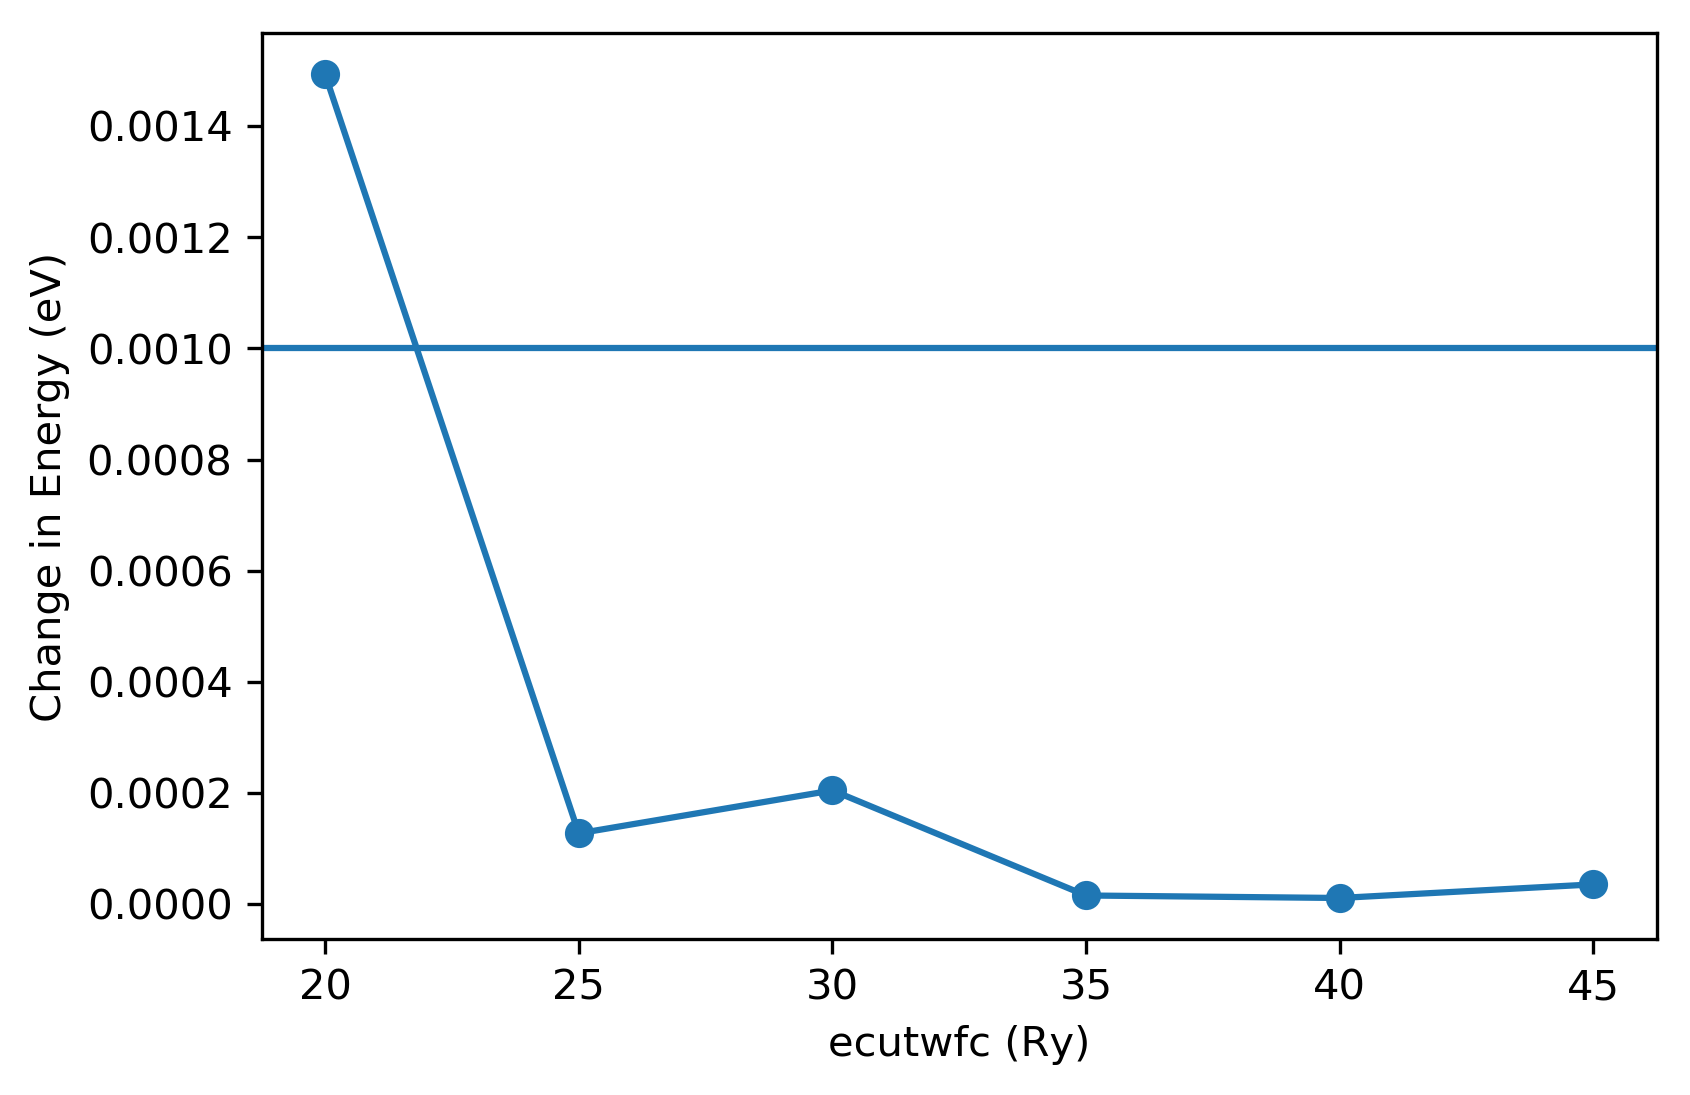

In [69]:
import matplotlib.pyplot as plt
import numpy as np
data = {
    'energies': [job.output.final_total_energy\
                 for job in complete_jobs],
    'ecutwfcs': [job.input.sections['system']['ecutwfc']\
                 for job in complete_jobs]
}
df = pd.DataFrame(data)
df.sort_values(by='ecutwfcs')
df['d_energies'] = [np.abs(df['energies'][i+1] - df['energies'][i])\
                    for i in range(len(df['energies'])-1)] + [np.nan]

fig = plt.figure()
fig.set_dpi(300)
ax = plt.gca()
plt.plot(df['ecutwfcs'], df['d_energies'], marker='o')
ax.axhline(0.001)
plt.xlabel('ecutwfc (Ry)')
plt.ylabel('Change in Energy (eV)')
plt.show()
plt.close()